Final cost: 0.2291057867949178, Parameters: [ 0.32395465  2.38613663 -2.49462467]


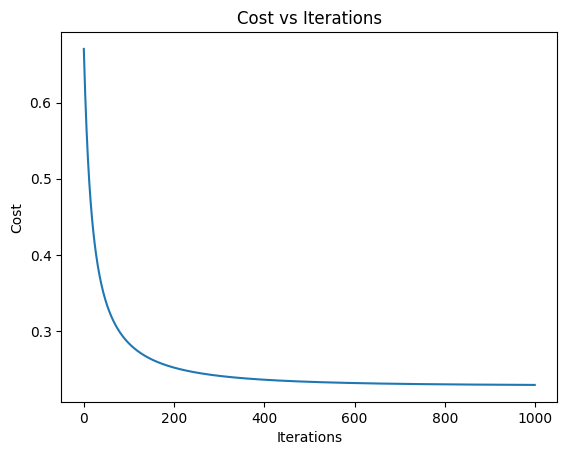

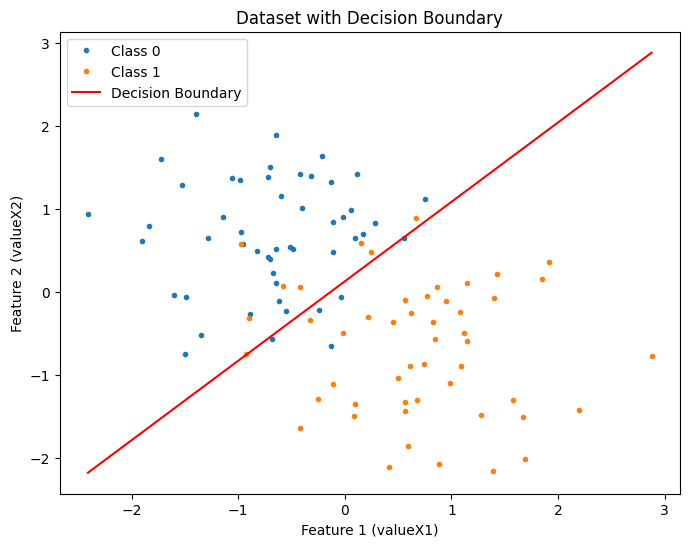

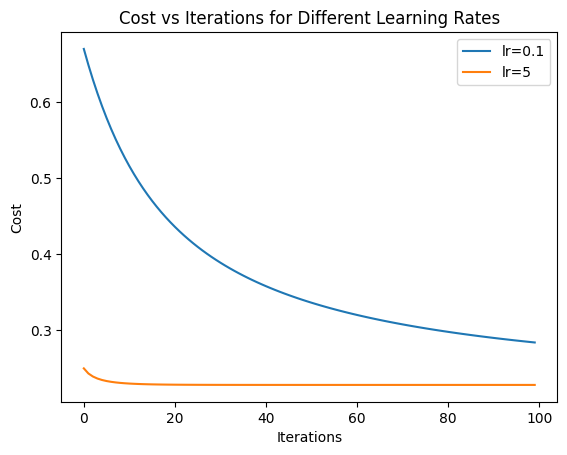

Confusion Matrix:
[[45  5]
 [ 8 42]]
Accuracy: 0.87, Precision: 0.89, Recall: 0.84, F1-Score: 0.87


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset with specified column names
df_x = pd.read_csv("logisticX.csv", header=None, sep=',', names=['valueX1', 'valueX2'])
df_y = pd.read_csv("logisticY.csv", header=None, sep='\t', names=['valueY'])

# Extract values for computation
x = df_x.values
y = df_y.values.reshape(-1, 1)  # Ensure y is a column vector

# Normalize features
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Add intercept term to X
x = np.hstack((np.ones((x.shape[0], 1)), x))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(x, y, theta):
    m = len(y)
    h = sigmoid(np.dot(x, theta))
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent
def gradient_descent(x, y, theta, lr, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = sigmoid(np.dot(x, theta))
        gradient = (1 / m) * np.dot(x.T, (h - y))
        theta -= lr * gradient
        costs.append(compute_cost(x, y, theta))
    return theta, costs

# Initialize parameters
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
iterations = 1000

# Train model
theta, costs = gradient_descent(x, y, theta, learning_rate, iterations)

# Print results
final_cost = costs[-1]
print(f"Final cost: {final_cost}, Parameters: {theta.ravel()}")

# Plot cost vs iterations
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# Plot dataset with decision boundary
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.plot(x[y.ravel() == label, 1], x[y.ravel() == label, 2], '.', label=f'Class {int(label)}')

# Decision boundary
x_boundary = np.linspace(min(x[:, 1]), max(x[:, 1]), 100)
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]
plt.plot(x_boundary, y_boundary, 'r', label='Decision Boundary')
plt.xlabel('Feature 1 (valueX1)')
plt.ylabel('Feature 2 (valueX2)')
plt.title('Dataset with Decision Boundary')
plt.legend()
plt.show()

# Compare learning rates
learning_rates = [0.1, 5]
all_costs = []
for lr in learning_rates:
    _, lr_costs = gradient_descent(x, y, np.zeros((x.shape[1], 1)), lr, 100)
    all_costs.append(lr_costs)

for lr, costs in zip(learning_rates, all_costs):
    plt.plot(range(len(costs)), costs, label=f'lr={lr}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for Different Learning Rates')
plt.legend()
plt.show()

# Confusion matrix and metrics
def predict(x, theta):
    return (sigmoid(np.dot(x, theta)) >= 0.5).astype(int)

y_pred = predict(x, theta)

confusion_matrix = np.array([
    [(y_pred[y == 0] == 0).sum(), (y_pred[y == 0] == 1).sum()],
    [(y_pred[y == 1] == 0).sum(), (y_pred[y == 1] == 1).sum()]
])

accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
recall = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print("Confusion Matrix:")
print(confusion_matrix)
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}")

Github link - https://github.com/rahulkr08cse/AI-LAB/blob/main/LAB4/main4.ipynb